# Project: Investigate Medical Dataset for No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

## Questions
1. Is Gender a significant variable to predict if a patient will show up for their scheduled appointment?
 
2. Are patients from a  particular age group tends to skip the medical appointments?
 
3. Does waiting time influences patients not to show up?

4. Is there a weekday pattern where people do not show up for appointments?
 
5. Are patients suffering from Hypertension are missing appointments?
 
6. The patients who receives SMS turn up more than the ones who didn't?

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Load data

In [366]:
# Load CSV and create a dataframe df
df = pd.read_csv('noshow_data.csv')

### Basic information about Data

In [367]:
# no of samples and columns in the dataset
df.shape

(110527, 14)

In [368]:
# Datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [74]:
# initial look at the data
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [76]:
# gather descriptive statistics about data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Initial Data Summary
- The data has total 110527 rows with 14 columns.
- There are 13 independent variables and 1 dependednt variable No-show.
- The average age of the Patient is around 37 yrs
- Very few people have scholarships.
- Approx 20% of the Patients have Hypertension but others like Diabetes, Alcoholism is very low

In [369]:
# finding duplicate rows in the dataset
df.duplicated().sum()

0

No duplicated row found in data

In [370]:
# looking at unique count in columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [371]:
# Checking for any outliers in age
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

Found Age = -1 that looks like human error. This value must be removed during data cleanup.

In [373]:
# checking Neighbourhood
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

Some of the hospital names like 'SÃO CRISTÓVÃO' contains special character but we don't need to treat them specially for our analysis

In [374]:
# unique values in Gender and Scholarship
print("Gender: {} Scholarship: {}".format(df['Gender'].unique(), df['Scholarship'].unique()))

Gender: ['F' 'M'] Scholarship: [0 1]


In [375]:
# unique values in Hipertension and Diabetes
print("Hipertension: {} Diabetes: {}".format(df['Hipertension'].unique(), df['Diabetes'].unique()))

Hipertension: [1 0] Diabetes: [0 1]


In [376]:
# unique values in Alcoholism and Handcap
print("Alcoholism: {} Handcap: {}".format(df['Alcoholism'].unique(), df['Handcap'].unique()))

Alcoholism: [0 1] Handcap: [0 1 2 3 4]


Note: As per the original Kaggle documentation https://www.kaggle.com/joniarroba/noshowappointments Handcap has only 2 values True or False. Something to take care during data cleanup. 

In [377]:
# unique values SMS_received and No-show
print("SMS_received: {} No-show: {}".format(df['SMS_received'].unique(), df['No-show'].unique()))

SMS_received: [0 1] No-show: ['No' 'Yes']


### Observation about data
1. Few columns like Handcap, Hipertension and No-show are misspelled and not consistent with other column names
2. ScheduledDay and AppointmentDay stores Date and time but datatype is Object.
3. The timestamp in AppointmentDay is all set to 00:00:00 that looks irrelevant for analysis and needs to be removed. Further ScheduledDay timestamp is of no importance without  AppintmentDay and no relation could be established between both dates. Hance, ScheduledDay timestamp could be removed. 
4. PatientId and AppointmentID are not relevant to our analysis and needs to be dropped.
5. Age is -1 indicates there's human data error that needs further investigation.
6. Need to find any outliers present in ScheduledDay and AppointmentDay where AppointmentDay is before ScheduledDay.
7. Correct Handicap Data values

### Cleaning Column Labels

In [84]:
# rename Handcap to Handicap, Hipertension to Hypertension and No-show to No_show
df = df.rename(columns = {'Handcap': 'Handicap', 'Hipertension': 'Hypertension','No-show': 'No_show'})

In [85]:
# check the columns are renamed
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Drop columns

In [86]:
# drop patientid and appointmentid columns which are of no significance for analysis
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [87]:
# confirm the columns are dropped
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Remove outliers

In [88]:
# find number of rows where age < 0
len(df.query("Age < 0")), len(df)

(1, 110527)

In [89]:
# choose age >= 0 and drop ouliers in data
df = df.query("Age >=0")

In [90]:
# check the outlier is removed and the count of samples
len(df.query("Age < 0")), len(df)

(0, 110526)

### Extract Date from ScheduledDay and AppointmentDay Columns

In [91]:
# define a function to extract date
def extract_date(d):
    return pd.to_datetime(d).date()

In [92]:
df['ScheduledDay'] = df['ScheduledDay'].apply(extract_date)

In [93]:
df['AppointmentDay'] = df['AppointmentDay'].apply(extract_date)

In [94]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [95]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handicap           int64
SMS_received       int64
No_show           object
dtype: object

In [96]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [97]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
No_show           110526 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


In [99]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Finding outlier in ScheduledDay and AppointmentDay Data

In [100]:
# check if scheduled date is after appointment date
outliers = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [101]:
outliers

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Length: 110526, dtype: int64

In [102]:
outliers = outlier[outlier < 0]

In [103]:
outliers.index

Int64Index([27033, 55226, 64175, 71533, 72362], dtype='int64')

In [104]:
# removing 6 rows as they're treated as outliers or human error
df.drop(outliers.index, inplace=True)

In [105]:
df.shape

(110521, 12)

In [106]:
# count of each value in Handicap Data
df.Handicap.value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: Handicap, dtype: int64

### Since 0 has a count 108285, it's safe to assume other values [1,2,3,4] indicates the patient is Handicap. We need to convert  [1,2,3,4] to 1.

In [107]:
# converting [1,2,3,4] to 1 
df['Handicap'] = (df.Handicap > 0).astype(np.int)

In [108]:
df['Handicap']

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: Handicap, Length: 110521, dtype: int64

In [109]:
# count Handicap to confirm numbers
df.Handicap.value_counts()

0    108282
1      2239
Name: Handicap, dtype: int64

In [110]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Feature Extraction

#### Waiting_Time in days

In [111]:
df['Waiting_Time'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [112]:
df['Waiting_Time'].min(), df['Waiting_Time'].max()

(0, 179)

In [113]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Waiting_Time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


#### Extracting Weekday from date to analyze distribution of data over weekdays

In [114]:
mapDayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Weekday'] = df['AppointmentDay'].dt.dayofweek.map(mapDayOfWeek)

In [115]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Waiting_Time,Weekday
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


In [116]:
df.shape

(110521, 14)

<a id='eda'></a>
## Exploratory Data Analysis

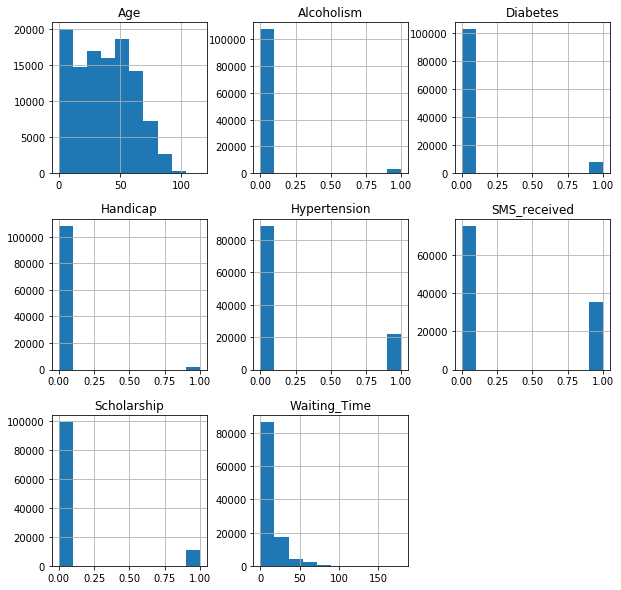

In [142]:
df.hist(figsize=(10,10));

### General Observation 
1. As per Age distrribution young and middle age patients are more as compared to old age.
2. Most people are not Handicap or Alcoholic or have diabetes.
3. Almost 20% of the patients have Hypertension and it would be interesting to combine with other categorical variables
4. Approx 35% of people receives SMS about appointment.
5. The waiting time is quite less for most of the appointment.

#### Age, Waiting_time, Hypertension and SMS_received will be analyzed further along with other Categorical Variables No_show, Gender, Weekday and Neighbourhood to answer the question.

## Question 1.  Is Gender a significant variable to predict if a patient will show up for their scheduled appointment?

In [159]:
df['Gender'].value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

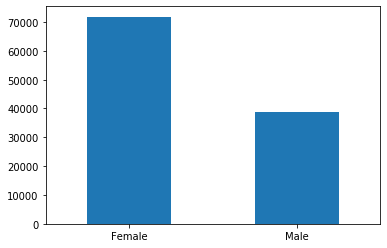

In [156]:
# Patient appointments by Gender
ax = df['Gender'].value_counts().plot(kind='bar');
ax.set_xticklabels(['Female', 'Male'], rotation=0);
plt.show;

Above graph shows Females are almost frequeent visitors than Males. The percentage of Female Vs Male is 65/35.

In [176]:
# check the count for each Gender for show/no_show
pd.crosstab(df.Gender, df.No_show, margins=True, margins_name="Total")

No_show,No,Yes,Total
Gender,,,
F,57245,14591,71836
M,30962,7723,38685
Total,88207,22314,110521


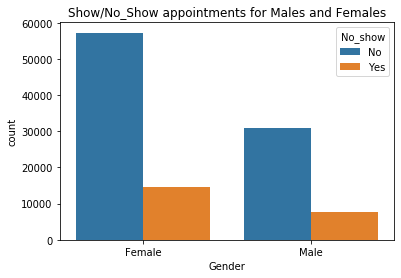

In [164]:
# Let's plot Show/No_Show appointments for Males and Females
ax = sns.countplot(x=df.Gender, hue=df.No_show, data=df)
ax.set_xticklabels(['Female', 'Male'])
ax.set_title('Show/No_Show for Males and Females')
plt.show()

In [166]:
# let's check the proportion of Females for No show
df.query("Gender == 'F' and No_show == 'Yes'").size / df.query("Gender == 'F'").size

0.2031154295896208

In [167]:
# let's check the proportion of Males for No show
df.query("Gender == 'M' and No_show == 'Yes'").size / df.query("Gender == 'M'").size

0.19963810262375598

Both Females and Males have same proportion of No show approx 20%.

## Question 2. Are patients from a particular age group tends to skip the medical appointments?

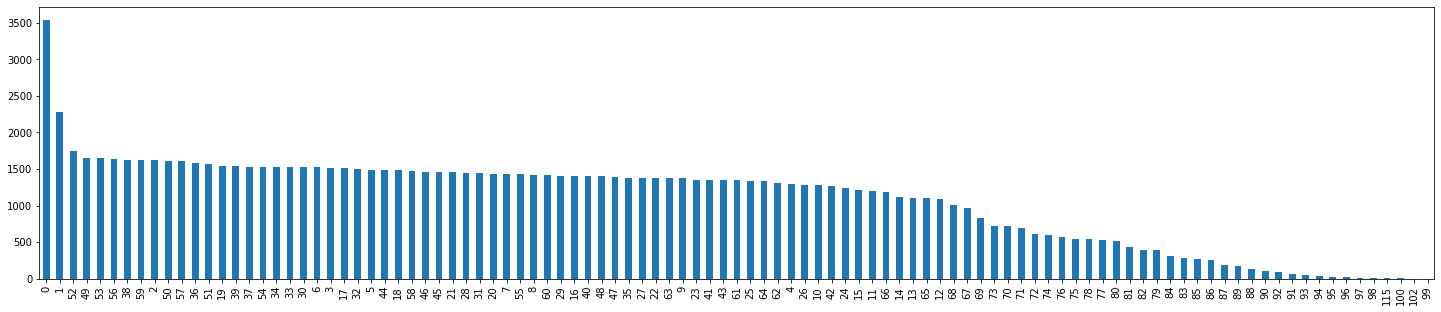

In [119]:
# let's look at the count of patients making appointments w.r.t Age
df.Age.value_counts().plot(kind='bar', figsize=(25,5));

New born babies and small children are the most frequent visitors. There's a decrease in hospital visits among older population.

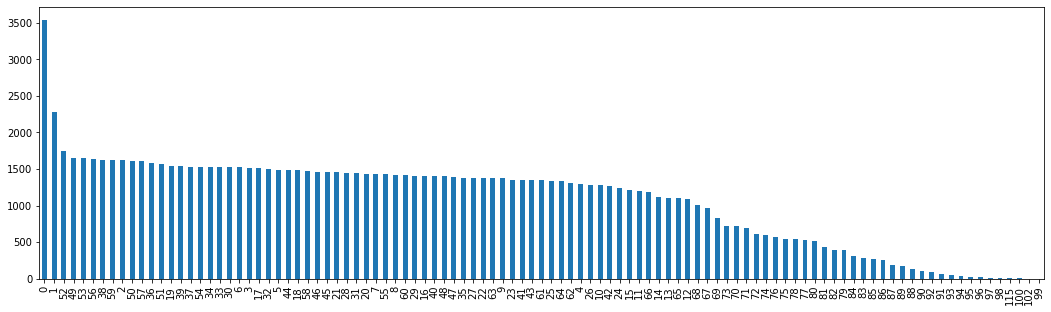

In [365]:
# let's check the Top 25 age visitors
df['Age'].value_counts().plot(kind='bar', figsize=(18, 5));

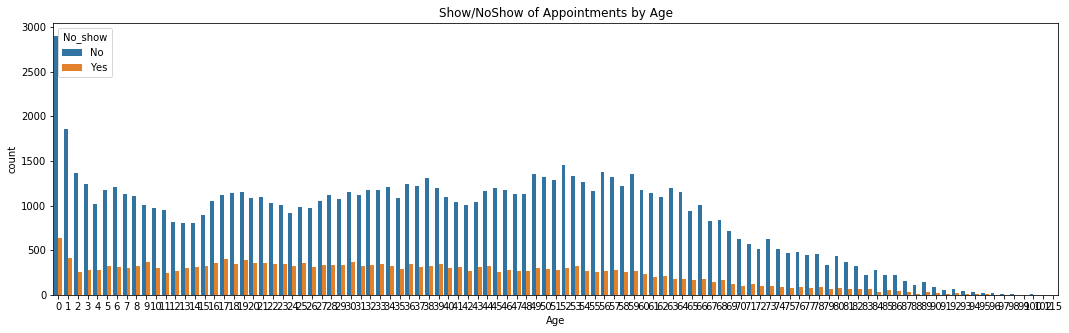

In [204]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x=df.Age, hue=df.No_show)
ax.set_title("Show/NoShow Appointments by Age")
plt.show()

In [231]:
# let's check the proportion of Age with show/no show
no_show_prop = df.query("No_show == 'Yes'").groupby(['Age']).size() / df.groupby(['Age']).size()

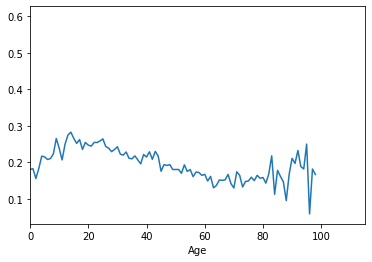

In [276]:
no_show_prop.plot(kind='line');

In [233]:
# let's check the proportion of Age with show/no show
show_prop = df.query("No_show == 'No'").groupby(['Age']).size()/df.groupby(['Age']).size()

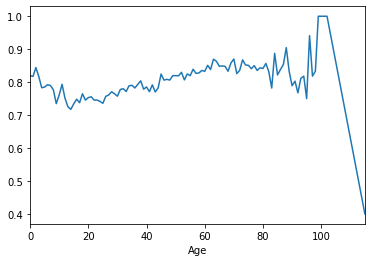

In [310]:
show_prop.plot(kind='line');

### Question 3. Does waiting time influences patients not to show up?


In [260]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 0, 7, 30, 90, 180 ] # Fill in this list with five values you just found

In [261]:
bin_names = ['same day', '1 week', '1 month', '3 months', '6 months+']

In [264]:
df['Waiting_Period'] = pd.cut(df['Waiting_Time'], bin_edges, labels=bin_names)

In [265]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Waiting_Time,Weekday,Waiting_Periods,Waiting_Period
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,same day,same day
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,same day,same day
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,same day,same day
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,same day,same day
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,same day,same day


In [272]:
# check the count for each Gender for show/no_show
pd.crosstab(df.Waiting_Period, df.No_show, margins=True, margins_name="Total")

No_show,No,Yes,Total
Waiting_Period,,,
same day,36770,1792,38562
1 week,24413,7772,32185
1 month,20071,9325,29396
3 months,6792,3369,10161
6 months+,161,56,217
Total,88207,22314,110521


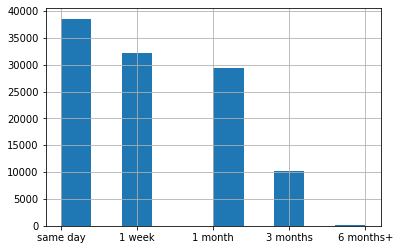

In [266]:
df.Waiting_Period.hist();

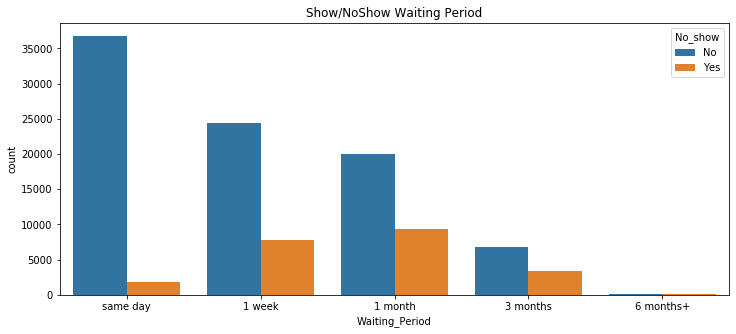

In [267]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x=df.Waiting_Period, hue=df.No_show)
ax.set_title("Show/NoShow Waiting Period")
plt.show()

In [292]:
show_wtg_prop = df.query("No_show == 'No'").groupby(['Waiting_Period']).size()/df.groupby(['Waiting_Period']).size()

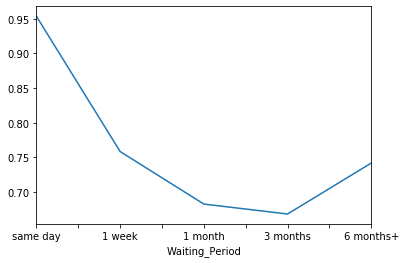

In [293]:
show_wtg_prop.plot(kind='line');

### Question 4. Is there a weekday pattern where people do not show up for appointments?

In [308]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

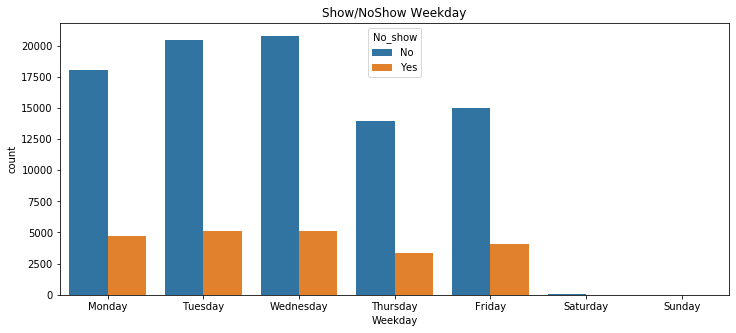

In [311]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x=df.Weekday, hue=df.No_show, order = week_order)
ax.set_title("Show/NoShow Weekday")
plt.show()

As seen from the above, there are more appointments at the start of the week than weekend. The proportion of show/No show is not very significant throughout the week and there's no clear pattern emerging out of weekday data.

In [324]:
no_show_wk_prop = df.query("No_show == 'Yes'").groupby(['Weekday']).size()/df.groupby(['Weekday']).size()

In [325]:
no_show_wk_prop.sort_values(ascending=False)

Weekday
Saturday     0.230769
Friday       0.212261
Monday       0.206446
Tuesday      0.200874
Wednesday    0.196861
Thursday     0.193494
dtype: float64

### Question 5. Are patients suffering from Hypertension are missing appointments?

In [349]:
pd.crosstab(df.Hypertension, df.No_show, margins=True, margins_name="Total")

No_show,No,Yes,Total
Hypertension,,,
0,70178,18542,88720
1,18029,3772,21801
Total,88207,22314,110521


Almost 20 % of the patients have Hypertension.

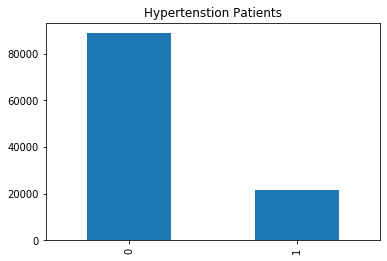

In [346]:
# count plot for patients having Hypertension
df['Hypertension'].value_counts().plot(kind='bar', title='Hypertenstion Patients');

In [357]:
# Let's check the percentage of Hypertension Patients with show/No_show
pd.crosstab(df.Hypertension, df.No_show, normalize = "index")

No_show,No,Yes
Hypertension,,
0,0.791005,0.208995
1,0.826980,0.173020


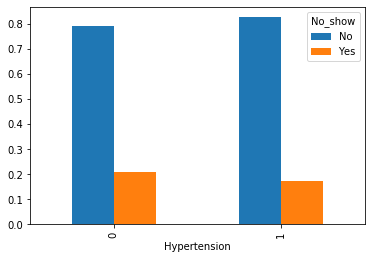

In [358]:
pd.crosstab(df.Hypertension, df.No_show, normalize = "index").plot(kind='bar');

17% of total Patients who missed the appointments have Hypertension.

### Question 6. The patients who receives SMS turn up more than the ones who didn't?

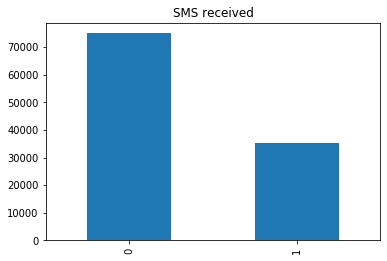

In [361]:
df['SMS_received'].value_counts().plot(kind='bar', title='SMS received');

In [360]:
pd.crosstab(df.SMS_received, df.No_show, normalize = "index")

No_show,No,Yes
SMS_received,,
0,0.833020,0.166980
1,0.724255,0.275745


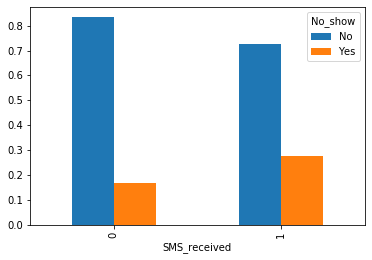

In [363]:
pd.crosstab(df.SMS_received, df.No_show, normalize = "index").plot(kind='bar');

The pateints who received SMS has lower show-up percentage than the ones who did. This is negative trend and looks like sending SMS to patients as a reminder is not helping much.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!